# Tech challenge

Aims:<br>
What is the best combustible? <br>
Can we accurately predict consumption?<br>
<br>

Hypotheses:<br>
NULL: There is no significant difference in the means of the gas types.<br>
ALTERNATIVE: There is a significant difference in the means of the gas types.<br>


# Data Cleaning/Refining

In [109]:
import pandas as pd
import numpy as np

In [110]:
data = pd.read_csv('data\measurements.csv')
display(data)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [111]:
#data2 = pd.read_excel('data\measurements2.xlsx')
#display(data2)

In [112]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [113]:
data['temp_inside'].value_counts()

21,5    133
22      102
22,5     59
20       25
21       13
23       13
25       12
24,5      7
20,5      4
24        3
23,5      2
25,5      2
19        1
Name: temp_inside, dtype: int64

In [114]:
value_counts = data['specials'].value_counts(dropna=False)
print(value_counts)

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64


In [115]:
def standardize_column(df, column_name, mapping_dict):
    df[column_name] = df[column_name].replace(mapping_dict)
    return df

In [116]:
mapping_dict = {
    'rain': 'Rain',
    'sun': 'Sun',
    'AC rain': 'AC Rain',
    'ac': 'AC',
    'snow': 'Snow',
    'sun ac': 'Sun AC',
    'AC snow': 'AC Snow',
    'AC sun': 'AC Sun',
    'AC Sun': 'AC Sun',
    'ac rain': 'AC Rain'
}

In [117]:
data = standardize_column(data, 'specials', mapping_dict)

In [118]:
data['specials'] = data['specials'].fillna('Unknown')

In [119]:
value_counts = data['specials'].value_counts(dropna=False)
print(value_counts)

Unknown               295
Rain                   32
Sun                    27
AC                     14
AC Rain                10
Snow                    3
Sun AC                  3
AC Sun                  2
AC Snow                 1
half rain half sun      1
Name: specials, dtype: int64


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       388 non-null    object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [121]:
# Specify the columns to convert to float
columns_to_convert = ['distance', 'consume', 'temp_inside', 'temp_outside', 'refill liters']

In [122]:
data[columns_to_convert] = data[columns_to_convert].replace(',', '.', regex=True).astype(float)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    float64
 5   specials       388 non-null    object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(5), int64(4), object(3)
memory usage: 36.5+ KB


In [124]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12.0,Unknown,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13.0,Unknown,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15.0,Unknown,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14.0,Unknown,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15.0,Unknown,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18.0,Unknown,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31.0,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19.0,Unknown,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31.0,AC,SP98,1,0,0,NaN,NaN


# Feature Engineering

In [125]:
data['consume_per_distance'] = data['consume'] / data['distance']

In [126]:
data['consume_liter_per'] = data['consume']/100*data['distance']

In [127]:
data['km_absolute'] = data['distance'].cumsum()

In [128]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,consume_per_distance,consume_liter_per,km_absolute
0,28.0,5.0,26,21.5,12.0,Unknown,E10,0,0,0,45.0,E10,0.178571,1.4000,28.0
1,12.0,4.2,30,21.5,13.0,Unknown,E10,0,0,0,NaN,NaN,0.350000,0.5040,40.0
2,11.2,5.5,38,21.5,15.0,Unknown,E10,0,0,0,NaN,NaN,0.491071,0.6160,51.2
3,12.9,3.9,36,21.5,14.0,Unknown,E10,0,0,0,NaN,NaN,0.302326,0.5031,64.1
4,18.5,4.5,46,21.5,15.0,Unknown,E10,0,0,0,NaN,NaN,0.243243,0.8325,82.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18.0,Unknown,SP98,0,0,0,NaN,NaN,0.231250,0.5920,7563.1
384,16.1,4.3,38,25.0,31.0,AC,SP98,1,0,0,NaN,NaN,0.267081,0.6923,7579.2
385,16.0,3.8,45,25.0,19.0,Unknown,SP98,0,0,0,NaN,NaN,0.237500,0.6080,7595.2
386,15.4,4.6,42,25.0,31.0,AC,SP98,1,0,0,NaN,NaN,0.298701,0.7084,7610.6


In [129]:
data.isna().sum()

distance                  0
consume                   0
speed                     0
temp_inside              12
temp_outside              0
specials                  0
gas_type                  0
AC                        0
rain                      0
sun                       0
refill liters           375
refill gas              375
consume_per_distance      0
consume_liter_per         0
km_absolute               0
dtype: int64

# Data Exploration

In [130]:
data.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,consume_per_distance,consume_liter_per,km_absolute
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385,0.477237,0.935294,3559.626031
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282,0.770641,1.115967,2287.524551
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000,0.021801,0.120000,28.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000,0.229288,0.551650,1448.975000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000,0.324187,0.680600,3696.900000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000,0.431580,0.916500,5387.850000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000,8.846154,11.453300,7625.300000


In [131]:
df = data.copy()

In [132]:
drop_columns = df[['specials','refill liters', 'refill gas']]

df = df.drop(columns=drop_columns)

In [133]:
df.dropna(subset=['temp_inside'], inplace=True)

In [134]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,consume_per_distance,consume_liter_per,km_absolute
0,28.0,5.0,26,21.5,12.0,E10,0,0,0,0.178571,1.4000,28.0
1,12.0,4.2,30,21.5,13.0,E10,0,0,0,0.350000,0.5040,40.0
2,11.2,5.5,38,21.5,15.0,E10,0,0,0,0.491071,0.6160,51.2
3,12.9,3.9,36,21.5,14.0,E10,0,0,0,0.302326,0.5031,64.1
4,18.5,4.5,46,21.5,15.0,E10,0,0,0,0.243243,0.8325,82.6
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18.0,SP98,0,0,0,0.231250,0.5920,7563.1
384,16.1,4.3,38,25.0,31.0,SP98,1,0,0,0.267081,0.6923,7579.2
385,16.0,3.8,45,25.0,19.0,SP98,0,0,0,0.237500,0.6080,7595.2
386,15.4,4.6,42,25.0,31.0,SP98,1,0,0,0.298701,0.7084,7610.6


In [135]:
numerical = df.select_dtypes(include='number')
categorical = df.select_dtypes(exclude='number')

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

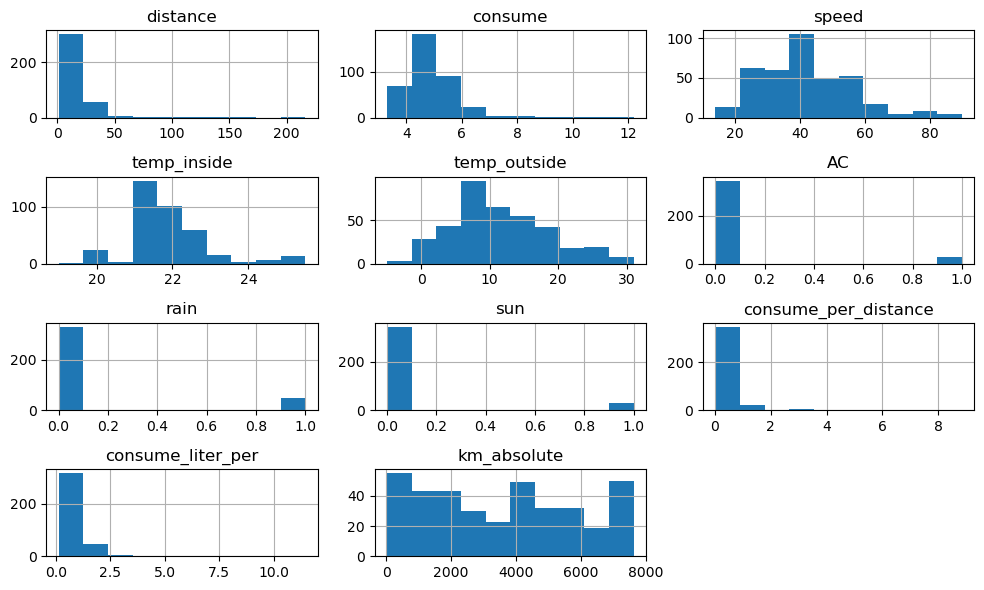

In [137]:
# Distribution of Numerical Variables
numerical.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

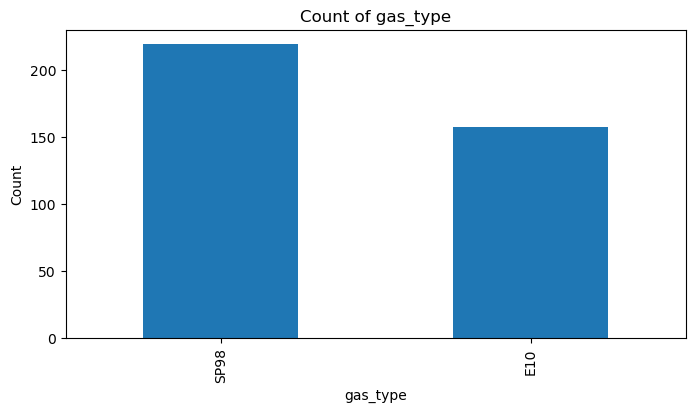

In [138]:
# Categorical Variables
for column in categorical:
    plt.figure(figsize=(8, 4))
    categorical[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count of {column}')
    plt.show()

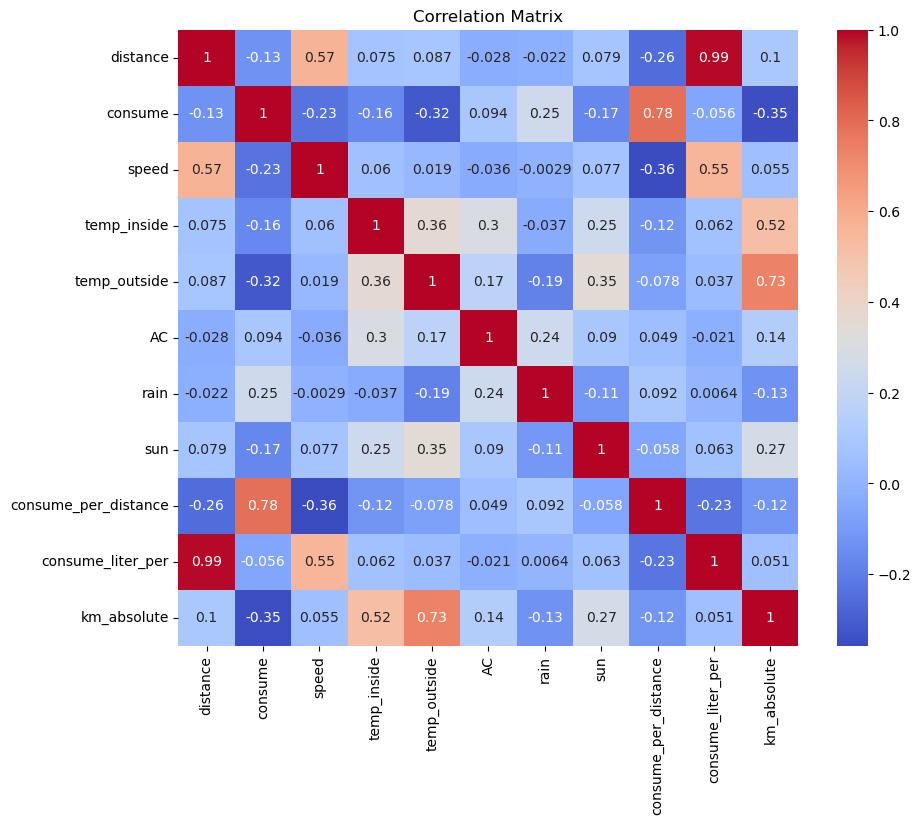

In [139]:
# Correlation Matrix
corr_matrix = numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [140]:
sorted_corr = corr_matrix.unstack().sort_values(ascending=False)
print(sorted_corr)

distance              distance                1.000000
consume               consume                 1.000000
consume_liter_per     consume_liter_per       1.000000
consume_per_distance  consume_per_distance    1.000000
sun                   sun                     1.000000
                                                ...   
consume               temp_outside           -0.318758
km_absolute           consume                -0.351663
consume               km_absolute            -0.351663
speed                 consume_per_distance   -0.357553
consume_per_distance  speed                  -0.357553
Length: 121, dtype: float64


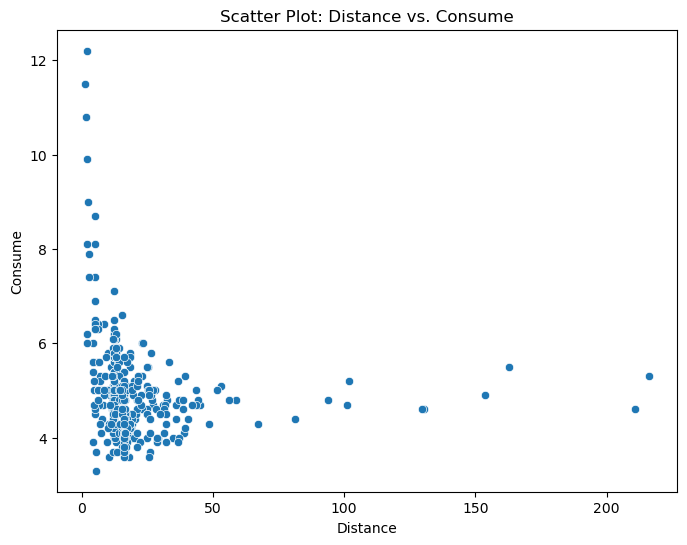

In [141]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='distance', y='consume', data=df)
plt.xlabel('Distance')
plt.ylabel('Consume')
plt.title('Scatter Plot: Distance vs. Consume')
plt.show()

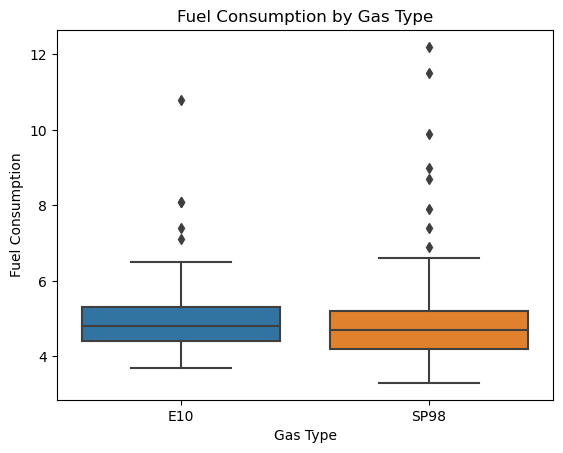

In [142]:
sns.boxplot(x='gas_type', y='consume', data=df)
plt.xlabel('Gas Type')
plt.ylabel('Fuel Consumption')
plt.title('Fuel Consumption by Gas Type')
plt.show()

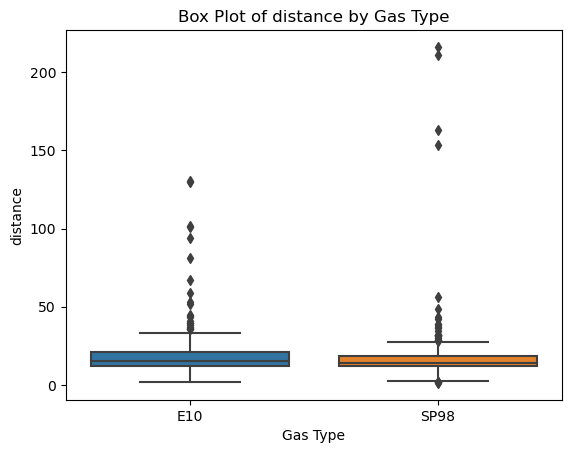

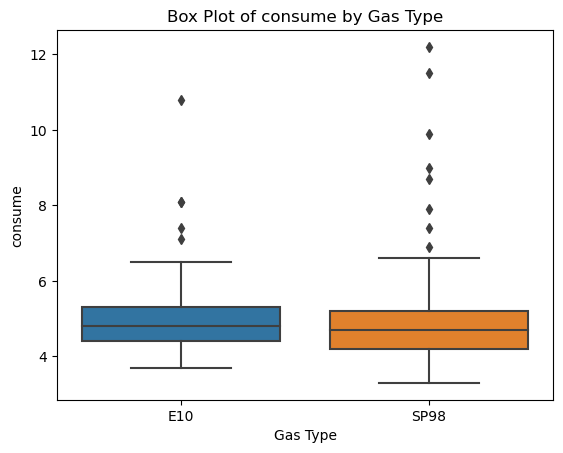

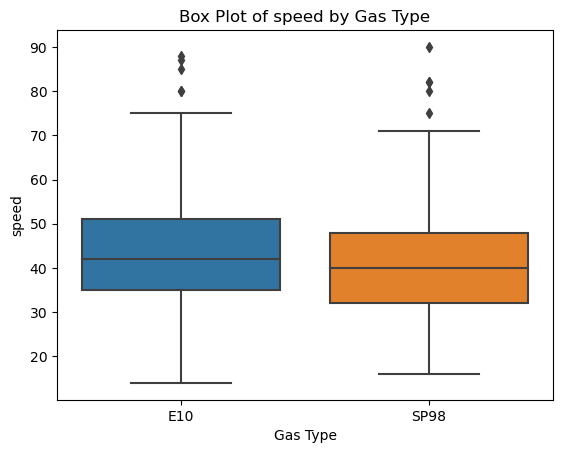

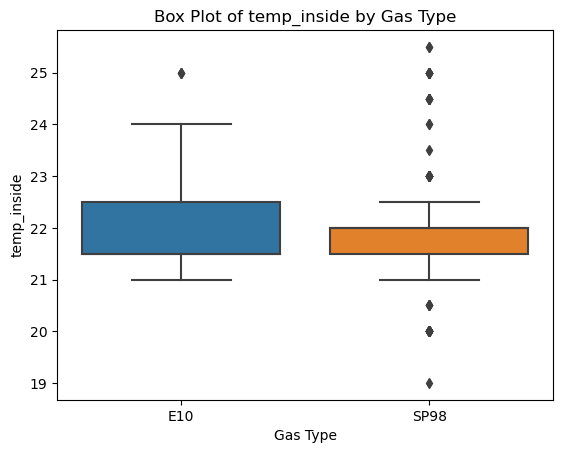

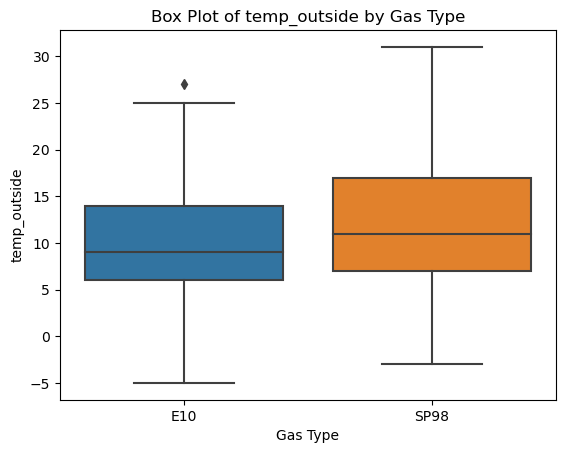

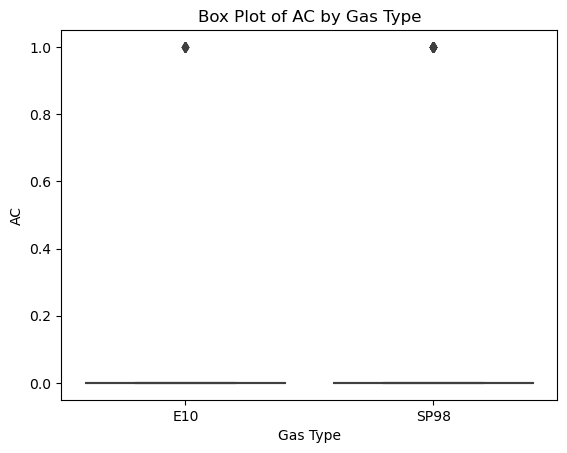

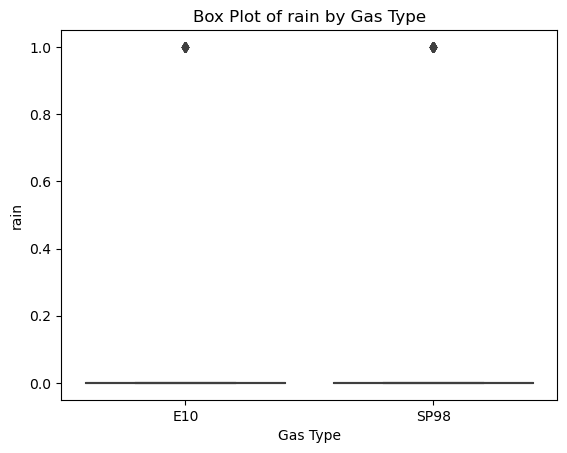

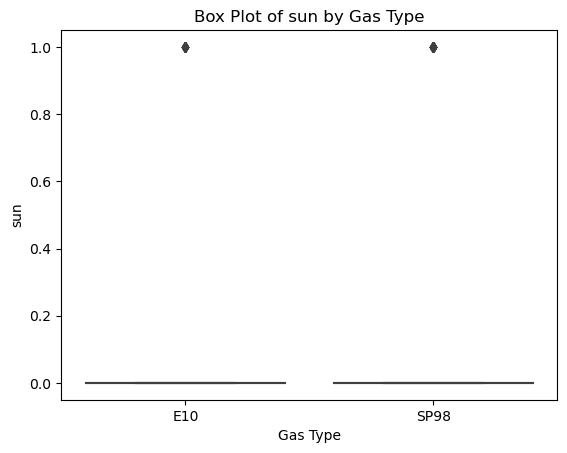

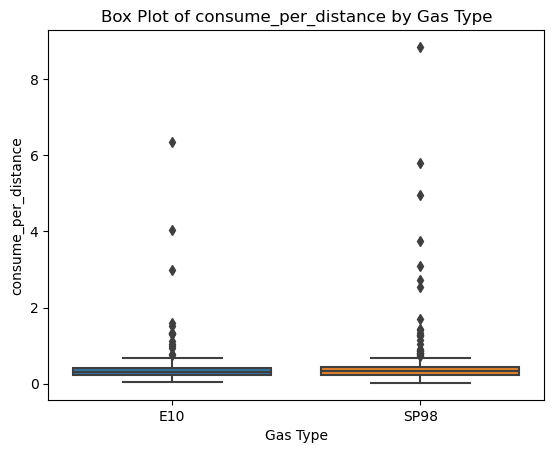

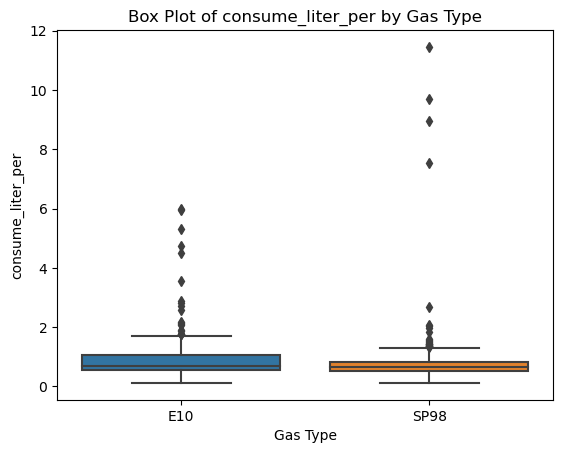

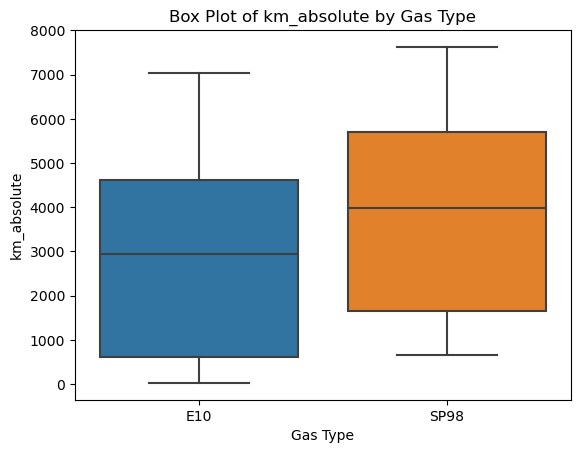

In [143]:
for column in numerical:
    sns.boxplot(x='gas_type', y=column, data=df)
    plt.xlabel('Gas Type')
    plt.ylabel(column)
    plt.title(f'Box Plot of {column} by Gas Type')
    plt.show()

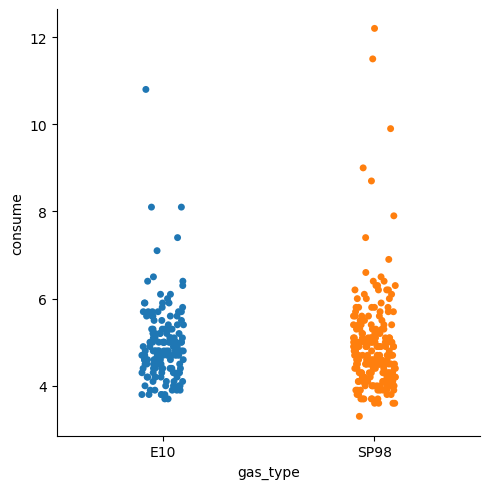

In [144]:
sns.catplot(x="gas_type", y="consume", data=df)

<AxesSubplot:xlabel='gas_type', ylabel='count'>

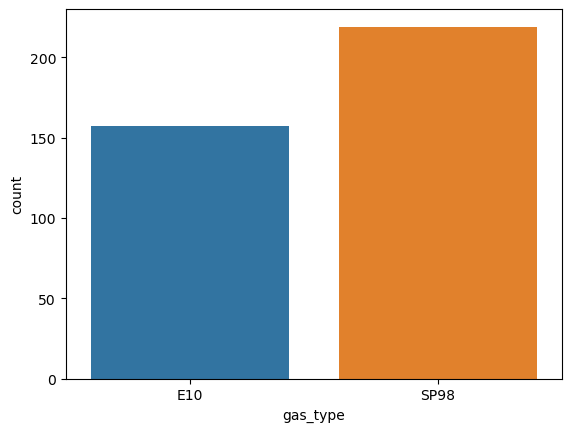

In [145]:
sns.countplot(x = 'gas_type', data = df)

<AxesSubplot:xlabel='consume', ylabel='distance'>

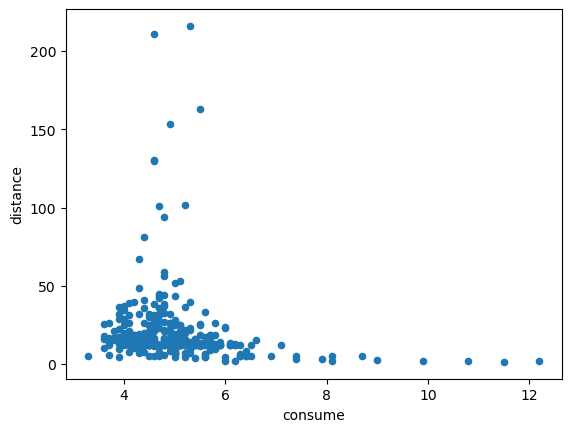

In [146]:
df.plot.scatter(x='consume', y='distance')

<AxesSubplot:xlabel='consume', ylabel='speed'>

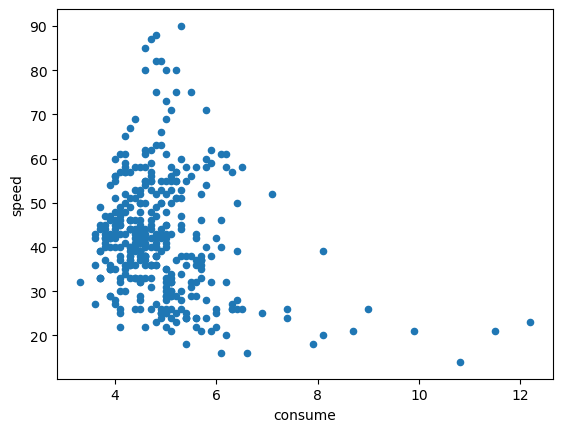

In [147]:
df.plot.scatter(x='consume', y='speed')

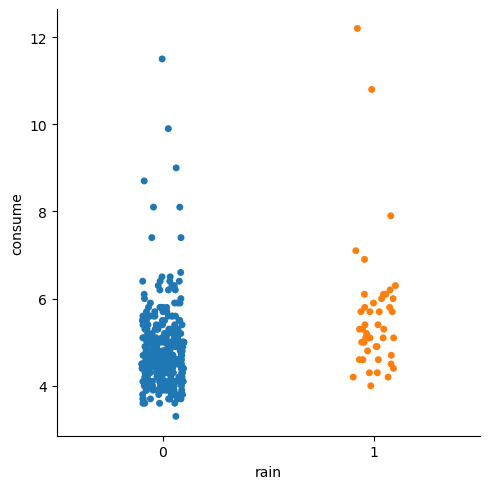

In [148]:
sns.catplot(x="rain", y="consume", data=df)

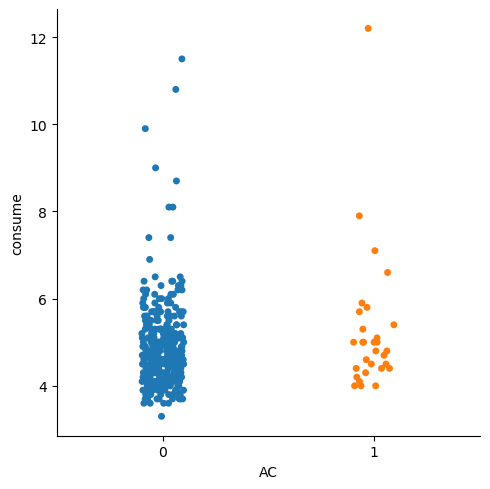

In [149]:
sns.catplot(x="AC", y="consume", data=df)

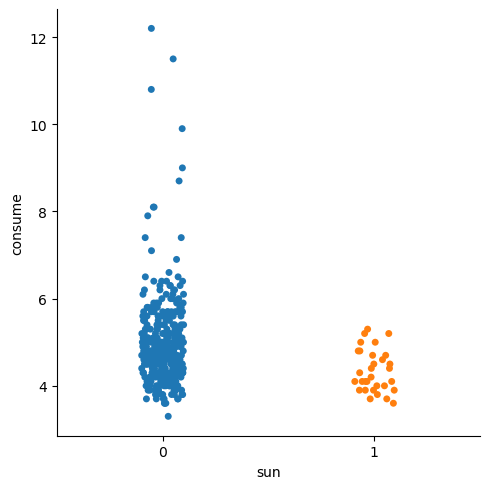

In [150]:
sns.catplot(x="sun", y="consume", data=df)

In [151]:
avg_fuel_efficiency = df.groupby('gas_type')['consume_per_distance'].mean()
print(avg_fuel_efficiency)

gas_type
E10     0.440749
SP98    0.509442
Name: consume_per_distance, dtype: float64


In [152]:
avg_speed = df.groupby('gas_type')['speed'].mean()
print(avg_speed)

gas_type
E10     43.566879
SP98    40.803653
Name: speed, dtype: float64


In [153]:
total_distance = df.groupby('gas_type')['distance'].sum()
print(total_distance)

gas_type
E10     3312.0
SP98    4131.8
Name: distance, dtype: float64


In [154]:
avg_distance = df.groupby('gas_type')['distance'].mean()
print(avg_distance)

gas_type
E10     21.095541
SP98    18.866667
Name: distance, dtype: float64


In [197]:
avg_consumption = df.groupby('gas_type')['consume'].mean()
print(avg_consumption)

gas_type
E10     4.950955
SP98    4.906849
Name: consume, dtype: float64


# Predicting consumption

In [155]:
X = df.drop(['consume'],axis=1)
y =df['consume']

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337) 

In [157]:
numericals_train = X_train.select_dtypes(np.number)
numericals_test = X_test.select_dtypes(np.number)
numericals_train.head()

,distance,speed,temp_inside,temp_outside,AC,rain,sun,consume_per_distance,consume_liter_per,km_absolute
170,22.7,55,21.5,6.0,0,0,0,0.207048,1.0669,2843.0
131,5.1,39,21.5,4.0,0,0,0,1.254902,0.3264,2079.1
278,16.0,41,22.0,11.0,0,0,0,0.281250,0.7200,5110.1
215,12.1,33,22.5,5.0,0,0,0,0.363636,0.5324,4000.0
330,39.5,58,22.0,25.0,0,0,0,0.106329,1.6590,6545.4


In [158]:
categoricals_train = X_train.select_dtypes(object)
categoricals_test = X_test.select_dtypes(object)
categoricals_train.head()

,gas_type
170,E10
131,SP98
278,SP98
215,SP98
330,E10


In [159]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categoricals_train)


categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
categoricals_test_encoded  = encoder.transform(categoricals_test).toarray()

categoricals_train_encoded = pd.DataFrame(categoricals_train_encoded, columns = encoder.get_feature_names_out())
categoricals_test_encoded  = pd.DataFrame(categoricals_test_encoded, columns = encoder.get_feature_names_out())
display(categoricals_train_encoded.head())
display(categoricals_test_encoded.head())

,gas_type_SP98
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


,gas_type_SP98
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


In [160]:
from sklearn.preprocessing import StandardScaler 
transformer = StandardScaler()


transformer.fit(numericals_train)
numericals_train_standardized = transformer.transform(numericals_train)
numericals_test_standardized = transformer.transform(numericals_test)

In [161]:
X_train = np.concatenate([numericals_train_standardized,categoricals_train_encoded],axis=1)
X_test = np.concatenate([numericals_test_standardized,categoricals_test_encoded],axis=1)

In [162]:
X_train = np.concatenate([numericals_train_standardized,categoricals_train_encoded],axis=1)
X_test = np.concatenate([numericals_test_standardized,categoricals_test_encoded],axis=1)

In [163]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [166]:
y_pred_train = lm.predict(X_train)

In [167]:
print(y_pred_train)

[ 4.66154956  5.90506213  4.49404465  4.61313195  3.70104929  3.75622703
  4.63327724  3.68897591  5.16481926  5.38138568  5.31228892  3.45780123
  4.53626201  5.18313011  4.93128389  6.51582711  5.7987811  10.75682046
  5.35522383  4.65533992  6.39899752  5.30601206  4.13673483  5.77063566
  5.34911755  5.08456235  4.14922565  4.726603    4.4002301   8.29419145
  5.56679106  5.34794131  3.78058424  6.32007836  4.68027007  5.02012323
  4.54739326  4.95062412  5.43605641  5.29583072  4.85493556  4.24227254
  4.54389687  4.65248025  3.7934547   4.21274214  3.87540242  4.1833204
  5.15860235  5.25187684  5.3537192   5.82517074  5.4057535   5.77199522
  4.65197953  4.49565073  4.66683059  4.60515507  4.64311558  5.11194463
  4.62389396  7.19783654  4.81110198  5.3385256   4.94793196  5.01800255
  5.21231725  3.86067734  3.94002923 12.62411994  3.83913198  4.97874518
  5.5445372   4.82388331  5.63485954  3.81907598  4.60036814  4.81256105
  4.38092434  4.23264945  4.67454843  4.59179333  4.

In [168]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.8397278341980814

In [169]:
y_pred_test = lm.predict(X_test)

In [170]:
r2_score(y_test, y_pred_test)

0.7723905363693675

In [ ]:
#Decent score for predictions, could be due to feature engineering. We will try with other models.

In [171]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def get_error_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    df_metrics = pd.DataFrame({
        'Error_metric': ['MAE', 'MSE', 'RMSE', 'MAPE', 'R2'],
        'Value': [mae, mse, rmse, mape, r2]
    })

    return df_metrics

In [173]:
train_metrics = get_error_metrics(y_train, y_pred_train)
print('Train Metrics:')
print(train_metrics)

# Calculate the metrics for the test set
test_metrics = get_error_metrics(y_test, y_pred_test)
print('Test Metrics:')
print(test_metrics)

Train Metrics:
  Error_metric     Value
0          MAE  0.283044
1          MSE  0.183991
2         RMSE  0.428941
3         MAPE  5.650625
4           R2  0.839728
Test Metrics:
  Error_metric     Value
0          MAE  0.288569
1          MSE  0.199020
2         RMSE  0.446116
3         MAPE  6.025783
4           R2  0.772391


In [174]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [176]:
#Training more models
model_list = ['LinearRegressor', 'KNeighborsRegressor', 'MLPRegressor']

In [177]:
trained_models = train_models(model_list, X_train, y_train)

C:\Users\Playtime\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [178]:
trained_models

[LinearRegression(), KNeighborsRegressor(), MLPRegressor()]

In [184]:
import pickle

In [186]:
# Save each trained model as a pickle file
for i, model in enumerate(trained_models):
    model_name = model_list[i]  # Get the model name
    file_name = f"{model_name}.pickle"  # Create the file name
    
    with open(file_name, 'wb') as f:
        pickle.dump(model, f)

print("Models saved as pickle files.")

Models saved as pickle files.


In [179]:
#Saving predicted values
predicted_values = {}

for i, model in enumerate(trained_models):
    model_name = model_list[i]  # Get the model name
    
    y_train_pred = model.predict(X_train)  # Get predictions for the training data
    y_test_pred = model.predict(X_test)  # Get predictions for the test data
    
    # Store the predicted values in a dictionary with model name as the key
    predicted_values[model_name] = {
        'Train': y_pred_train,
        'Test': y_pred_train
    }

In [187]:
for model_name, predictions in predicted_values.items():
    for dataset, values in predictions.items():
        file_name = f"{model_name}_{dataset}.pickle"
        with open(file_name, 'wb') as f:
            pickle.dump(values, f)

print("Predicted values saved as pickle files.")

Predicted values saved as pickle files.


In [191]:
for model_name, model in zip(model_list, trained_models):
    y_train_pred = model.predict(X_train)  # Get predictions for the training data
    y_test_pred = model.predict(X_test)  # Get predictions for the test data
    
    # Compute error metrics for training and test predictions
    train_metrics = get_error_metrics(y_train, y_train_pred)
    test_metrics = get_error_metrics(y_test, y_test_pred)

    print(f"Model: {model_name}")
    print("Training Error Metrics:")
    print(train_metrics)
    print("\nTest Error Metrics:")
    print(test_metrics)
    print("------------------------")

Model: LinearRegressor
Training Error Metrics:
  Error_metric     Value
0          MAE  0.283044
1          MSE  0.183991
2         RMSE  0.428941
3         MAPE  5.650625
4           R2  0.839728

Test Error Metrics:
  Error_metric     Value
0          MAE  0.288569
1          MSE  0.199020
2         RMSE  0.446116
3         MAPE  6.025783
4           R2  0.772391
------------------------
Model: KNeighborsRegressor
Training Error Metrics:
  Error_metric     Value
0          MAE  0.397092
1          MSE  0.324841
2         RMSE  0.569948
3         MAPE  7.734939
4           R2  0.717035

Test Error Metrics:
  Error_metric     Value
0          MAE  0.440426
1          MSE  0.394094
2         RMSE  0.627769
3         MAPE  8.732695
4           R2  0.549294
------------------------
Model: MLPRegressor
Training Error Metrics:
  Error_metric      Value
0          MAE   0.591881
1          MSE   0.559993
2         RMSE   0.748327
3         MAPE  12.092472
4           R2   0.512197

Test Erro

In [ ]:
#Best model to predict consumption is with Linear Regression

In [193]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [194]:
# Create the ANOVA model
model = ols('consume ~ gas_type', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

              sum_sq     df         F   PR(>F)
gas_type    0.177891    1.0  0.163881  0.68584
Residual  405.972083  374.0       NaN      NaN


In [ ]:
#ANOVA Tells us there isnt much of a difference in consumptions between the gas types.

In [ ]:
#We could do a simple groupby as done before to show the most efficient fuel type

In [199]:
import pandas as pd

avg_fuel_efficiency = df.groupby('gas_type')['consume_per_distance'].mean()#same as previous calculation

# Sort the gas types based on average fuel efficiency in descending order
sorted_gas_types = avg_fuel_efficiency.sort_values(ascending=False)

# Get the gas type with the highest average fuel efficiency (best combustible)
best_combustible = sorted_gas_types.index[0]

# Display the results
print("Average Fuel Efficiency by Gas Type:")
print(avg_fuel_efficiency)
print("\nBest Combustible: ", best_combustible)


Average Fuel Efficiency by Gas Type:
gas_type
E10     0.440749
SP98    0.509442
Name: consume_per_distance, dtype: float64

Best Combustible:  SP98


# Conclusion<br>
ANOVA Result:<br> 
The ANOVA test indicates that there is no significant difference in the fuel efficiency between the gas types.<br>
The p-value (PR(>F)) of 0.68584 is greater than the commonly used significance level of 0.05.<br> 
Therefore, we fail to reject the null hypothesis.<br>
Suggests that there is no significant difference in the means of the gas types.<br>

Average Fuel Efficiency:<br> 
When we calculate the average fuel efficiency by gas type, we can see that SP98 has a higher average fuel efficiency (0.509442) compared to E10 (0.440749).<br> 
This suggests that, on average, vehicles using SP98 have better fuel efficiency than those using E10.<br>


We could conclude that SP98 is the best combustible on average fuel efficiency values however we must note that ANOVA test did not detect a significant difference in the means. The difference may not be statistically significant.<br>
